# Seminar 5 - A review of Statistics, Model Fitting and Integration

Using statistics is an important part of doing research. We always want to report back uncertainties and use statisitcal methods to improve our analysis. There may be a time where you would need to perform random sampling of a distribution and having a good knowledge of statistics and how to code them up is going to be key to your research success. We will not cover every single thing in statistics as we will run out of time instead we will focus on a couple key things you may end up using in your research such as some basic statistical functions, model fitting and basic interpolation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cobaltblue = '#2e37fe'
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13

%matplotlib inline

# Introduction to Descriptive Statistics

In statistics there are some decriptive statistics that describe the data set using overall trends. Usually with a single number we try to gain some insights into a data set. While this is a good way of getting a general sense of the data you have to keep in mind what assumptions go into it and what cases could bias the descriptive statistics. 

A list of some of the descriptor statistics you may encounter and what they mean are listed below.

1. Mean(Average): The average value of a data set 


2. Standard Deviation: A measure of how the data is spread out relative to the mean.

   A low standard deviation means the data is really compact, high standard deviation mean data is very spread out 


3. Variance: Similar to 2 as it is the standard deviation squared and measures data spread realtive to the mean


4. Percentiles: Takes your data set and ranks them based on value, the percentile (q) represents the value at which q% of your data is at. Note that q = 50 is the same as median


5. Inter Quartile Range (IQR): The difference between the 75th and 25th percentiles. 
   Similar to standard deviation but a lot more robust to any outliers.

We will go over each of these and how we can use them in python using numpy and scipy functions.

In [ ]:
#generating Data to be used in the descriptive statistics section
np.random.seed(10203)

# 1D-Array with 50 evenly spaced entries from 0 - 100
oned_array = np.linspace(0, 100, 50)

# 2D-Array with 100 rows and 50 columns 
twoD_Array = np.random.normal(loc = 5, scale = 1, size = (100, 50))

In [ ]:
#Average
print(f'Average of the 1-D Array: {np.mean(oned_array)}')
print()
#Average
print(f'Average of the entire 2-D Array: {np.mean(twoD_Array)}')
print()
#Average value across each column
print(f'Average across the columns of the 2-D Array: \n {np.mean(twoD_Array, axis = 0)}')
print()
#Average value across each column
print(f'Average across the rows of the 2-D Array: \n {np.mean(twoD_Array, axis = 1)}')
print()

In [ ]:
#Standard Deviation
print(f'Standard deviation of the 1-D Array: {np.std(oned_array, ddof = 1)}')
print()
#Standard Deviation
print(f'Standard deviation of the entire 2-D Array: {np.std(twoD_Array, ddof = 1)}')
print()
#Standard Deviation
print(f'Standard deviation across the columns of the 2-D Array: \n {np.std(twoD_Array, ddof = 1, axis = 0)}')
print()
#Standard Deviation
print(f'Standard deviation across the rows of the 2-D Array: \n {np.std(twoD_Array, ddof = 1, axis = 1)}')

In [ ]:
#Variance
print(f'Variance of the 1-D array is: {np.var(oned_array, ddof = 1)}')
print()
#Variance
print(f'Variance of the entire 2-D array is: {np.var(twoD_Array, ddof = 1)}')
print()
#Variance
print(f'Variance across the columns of the 2-D array is: \n {np.var(twoD_Array, ddof = 1, axis = 0)}')
print()
#Variance
print(f'Variance across the rows of the 2-D array is: \n {np.var(twoD_Array, ddof = 1, axis = 1)}')


In [ ]:
#Percentiles
print(f'The 16th percentile of the 1-D Array is: {np.percentile(oned_array, q = 16)}')
print()
#Percentiles
print(f'The 16th percentile of the entire 2-D Array is: {np.percentile(twoD_Array, q = 16)}')
print()

#Percentiles
print(f'The 16th percentile across the columns of the 2-D Array is: \n {np.percentile(twoD_Array, q = 16, axis = 0)}')
print()

#Percentiles
print(f'The 16th percentile across the rows of the 2-D Array is: \n {np.percentile(twoD_Array, q = 16, axis = 1)}')

In [ ]:
#Multiple Percentiles
np.percentile(oned_array, q = (16, 50, 84))

In [ ]:
#Multiple Percentiles
np.percentile(twoD_Array, q = (16, 50, 84))

In [ ]:
#Multiple Percentiles along columns
col_16_percentile, col_50_percentile, col_84_percentile = np.percentile(twoD_Array, q = (16, 50, 84), axis = 0)

In [ ]:
col_16_percentile

In [ ]:
# Mutltiple Percentiles along rows
row_16_percentile, row_50_percentile, row_84_percentile = np.percentile(twoD_Array, q = (16, 50, 84), axis = 1)

In [ ]:
row_16_percentile

In [ ]:
from scipy.stats import iqr

In [ ]:
#Percentiles
print(f'The IQR of the 1-D Array is: {iqr(oned_array)}')
print()
#Percentiles
print(f'The IQR of the entire 2-D Array is: {iqr(twoD_Array)}')
print()

#Percentiles
print(f'The IQR across the columns of the 2-D Array is: \n {iqr(twoD_Array, axis = 0)}')
print()

#Percentiles
print(f'The IQR across the rows of the 2-D Array is: \n {iqr(twoD_Array, axis = 1)}')

# Statistical Distributions

Below we cover how to call and use statistical distributions in python. These distributions have many practical applications such as performing a box-car window extraction on a spectra, or drawing random samples to make many realizations of a spectra to compute line fluxes. We will go over two widely used statistical functions, the Uniform distribution and the Guassian(Normal) Distribution. 

# Uniform Distribution

This statistical distribution has many applications and we will go over some basic properties of the uniform distribution as well as how to call it within python to plot it or to grab values from the distribution. 

Functional Form:

$F(x) = \frac{1}{b - a}$ if $a \leq x \leq b$ 

$F(x)$ = 0 if $x \leq a$,  $b \leq x$

mean = $\frac{(a + b)}{2}$

median = $\frac{(a + b)}{2}$

In [ ]:
from scipy.stats import uniform

In [ ]:
uniform()

In [ ]:
#Making a Uniform Distribution from 10 - 25

# Making the x-axis array
x = np.linspace(0, 35, 100)  
                                #Start    #width
uniform_dist = uniform.pdf(x, loc = 10, scale = 15)

#Plotting Code
fig, ax = plt.subplots(nrows = 1, ncols = 1, facecolor = 'white')
ax.set_title('Uniform pdf')
ax.plot(x, uniform_dist, 'r-', lw=5, alpha=0.6)
ax.set_ylabel('Probability')
ax.set_xlabel('x-Axis')
plt.show()

In [ ]:
#Grabbing the probability where the x-axis value is 99
value = 99
uniform.pdf(value, loc = 10, scale = 15)

In [ ]:
random_values_from_uniform = uniform.rvs(loc = 10, scale = 15, size = 100)

In [ ]:
#seeing how well it reproduces a uniform distribution
fig, ax = plt.subplots()
ax.hist(random_values_from_uniform, color = 'dodgerblue')
ax.set_xlabel('x-Axis', fontsize = 15)
ax.set_ylabel('Number Counts', fontsize = 15)
plt.show()

# Gaussian Distribution

The Gaussian Distribution is the most widely used statistical function, having a base understanding of it will be useful for your research career as many emission lines profiles are well represented by a gaussian profile, many errors are gaussian in nature and knowing what it means to state a 1$\sigma$ error. 

Functional Form: 

$G(x, \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}$

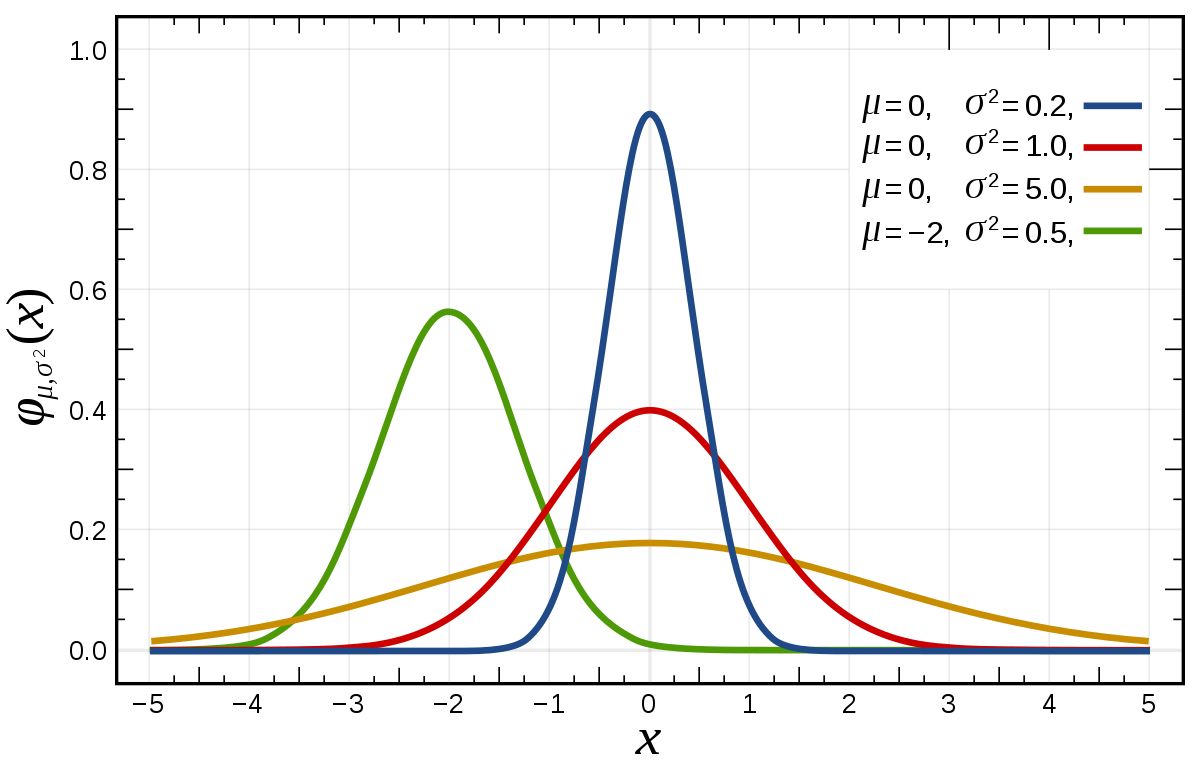

Average value of a Gaussian is: $\mu$

Standard Deviation: $\sigma$

Variance: $\sigma^2$

Range is: (-$\infty$, -$\infty$)

Useful Knowledge of a Gaussian:

$\pm 1\sigma$ contains 68% of the data

$\pm 2\sigma$ contains 95% of the data

$\pm 3\sigma$ contains 99.7% of the data

In [ ]:
from scipy.stats import norm

In [ ]:
#Making a Gaussian Distribution centered at 10 and a width of 15

# Making the x-axis array
x = np.linspace(-30, 50, 100)   
                        
                            #mu       #sigma
gaussian_dist = norm.pdf(x, loc = 10, scale = 15)

fig, ax = plt.subplots()
ax.set_title('Gaussian pdf')
ax.plot(x, gaussian_dist, 'r-', lw=5, alpha=0.6)
ax.axvline(10, color = 'black', alpha = 0.5, label = 'Mean')
ax.axvline(-5, color = 'black', linestyle = '--', label = r'-1$\sigma$')
ax.axvline(25, color = 'blue', linestyle = '--', label = r'+1$\sigma$')
ax.legend()
plt.show()

In [ ]:
# Getting random values from the gaussian with mu = 10 and sigma = 15
random_values_gaussian = norm.rvs(loc = 10, scale = 15, size = 1000)

In [ ]:
fig, ax = plt.subplots()

#plotting the histogram
ax.hist(random_values_gaussian, color = 'black', alpha = 0.5)

#plotting up the gaussian
ax.plot(x, 250*gaussian_dist/np.amax(gaussian_dist), 'r-', lw=5, alpha=0.6)

ax.set_xlabel('x-Axis', fontsize = 15)
ax.set_ylabel('Number Counts', fontsize = 15)
plt.show()

# Using a Gaussian to Perturb an Entire Array

In spectral analysis, it is very common to perform a method called bootstraping to estimate the uncertainty on a measurement without going through the entire error propagation formalism. What bootstrapping does is that it makes lots of realizations of a spectrum taking into acount the error on the spectrum. 

For every flux value there is an associated error indicating that the flux is some value f $\pm$ f_err. If we want to make a realization of this flux value based off of the error what we would do is take the flux as the center of our Gaussian and the x_err as our $\sigma$ in the Gaussian. Then what we would do is randomly sample this any number of times, and this value is up to us, but a good rule of thumb is $>$ 1000. We do this for every single pixel/element in the array to create a new spectrum. 

Let us say we want to measure the flux and the flux uncertainty of an emission line from a spectra. A way to get this is by using the bootstrap method. This method creates many spectra which we can then measure the flux for every realization. Once we measure the flux for every realization we would then need to find the 16th, 50th, and 84th percentile to get an estimate on the flux, flux = 50th_percentile and the uncertainty on the flux which would be lower_err = 50th_percentile - 16th_percentile, upper_error = 84th_percentile - 50th_percentile. Below is an example of how to use the Gaussian distribution to generate a new array.

In [ ]:
x = np.linspace(-30, 30, 200)
y = norm.pdf(x, loc = 0, scale = 15)*100
y_err = np.random.uniform(0, .5, size = 200)

new_y_perturbed_by_y_error = np.random.normal(loc = y, scale = y_err)

In [ ]:
fig, ax = plt.subplots()

#plotting the histogram
ax.plot(x, y, color = 'black', alpha = 0.3, label = 'Original Values')
ax.plot(x, new_y_perturbed_by_y_error, color = 'blue', alpha = 0.2, label = 'Perturbed Values')

ax.set_xlabel('x-Axis', fontsize = 15)
ax.set_ylabel('Values', fontsize = 15)
ax.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.plot(x, y, color = 'black', alpha = 0.3, label = 'Original Values')

for i in range(0, 2):

    new_y_perturbed_by_y_error = np.random.normal(loc = y, scale = y_err)
    if i == 0:
        ax.plot(x, new_y_perturbed_by_y_error - .1*i, # the -.1*i artificially moves the spectra down for visualization purposes 
                alpha = 0.2, label = 'Perturbed Values', 
                lw = 0.75)
    else:
        ax.plot(x, new_y_perturbed_by_y_error - .1*i, 
                lw = 0.75, 
                alpha = 0.2)
    
ax.set_xlabel('x-Axis', fontsize = 15)
ax.set_ylabel('Values', fontsize = 15)
ax.set_xlim(-10,10)
#ax.set_ylim(1.5, 3)
ax.legend()
plt.show()

# Random Sampling from your own data

In this section we will go over random sampling. This is a way to randomly grab a subset of your data with ease and this will come in handy when you want to perform bootstrap error propagation or when you are running any sort of Monte Carlo (MC) algorithm. We will cover two ways of randomly grabbing data one using a numpy function $\textbf{np.choice}$ and one where we will randomly grab indexes using $np.random.randint$ both have their unique features and one may be preferred over another, it all boils down to the problem you are after and what you want to get out of it.

In [ ]:
#generating data
data1 = np.array([12, 144, 23, 256, 432, 23, 67, 8765, 3234, 6765, 4, 345 , 100])
data2 = np.array([.023, .23, .1, .67, .345, .056, .956, .22, 1.2, 2.2, .234, .345, .100])

In [ ]:
#This function takes an array and will return back a random data set with the given 
#specified amount back with replacement
random_sample_data1 = np.random.choice(data1, size = 100)
random_sample_data2 = np.random.choice(data2, size = 100)

In [ ]:
random_sample_data1

In [ ]:
random_sample_data2

In [ ]:
#this will generate random integers and you can use these random integers to get the indexes
#Useful when you need to vary two things that are joined such as an (x, y) pair
indexes = np.random.randint(low = 0, high = len(data1), size = 100)

In [ ]:
rand_data1 = data1[indexes]
rand_data2 = data2[indexes]

# Model Fitting

Model fitting a way to test our theoretical models against actual observed data. By fitting our model to the data we can uncover if our model is accurate or if more tweaks need to be made to the model to fit the observed data. Model fitting is also a practical way of measuring fluxes and line profiles as emission lines can be well fit by a Gaussian. Knowing how to fit a model will inevitably help out your research tremendously. 

In [ ]:
np.random.seed(500)

#generating fake data
wavelength = np.linspace(1175, 1250, 100)
                                        #mu    #sigma                        #adding random noise to the gaussian
noisy_emission_line = 100* norm.pdf(wavelength, loc = 1215.67, scale = 10) + np.random.normal(loc = 0, scale = 1, size = 100)

In [ ]:
plt.figure(figsize = (7, 5), facecolor = 'white')
plt.plot(wavelength, noisy_emission_line)
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.show()

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
curve_fit()

In [ ]:
def Gaussian(x, A, mu, sigma):
    
    '''
    A generic Gaussian Function used for model fitting.
    
    Functional Form: A * e^(-(x - mu)^2 / sigma^2)
    
    Inputs
    ---------------
    x (array): Value(s) to evaluate the Gaussian at
    A: Amplitude of the Gaussian
    mu: The center/average value of the Gaussian
    sigma: the standard deviation of the Gaussian
    
    
    Returns
    ---------------
    Gaussian (array): the Gaussian distribution along the values x for the given A, mu and sigma
    '''
    
    return A * np.exp(- (x - mu)**2/sigma**2)

In [ ]:
best_guess_A = 
best_guess_mu = 
best_guess_sigma = 
p0 = [best_guess_A, best_guess_mu, best_guess_sigma]

gauss_popt, gauss_cov = curve_fit(Gaussian, xdata = wavelength, ydata= noisy_emission_line, 
                                  p0=p0)

In [ ]:
print(f'Best Fit Amplitude is: {gauss_popt[0]}')
print(f'Best Fit mu is: {gauss_popt[1]}')
print(f'Best Fit sigma is: {gauss_popt[2]}')

In [ ]:
plt.figure(figsize = (7, 5), facecolor = 'white')

#plotting up the noisy data
plt.plot(wavelength, noisy_emission_line, label = 'Observed Data')

#plotting up the model fit
plt.plot(wavelength, Gaussian(wavelength, gauss_popt[0], gauss_popt[1], gauss_popt[2]), label = 'Modeled Data')

plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Flux', fontsize = 15)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (7, 5), facecolor = 'white')

#plotting up the noisy data
plt.plot(wavelength, noisy_emission_line, label = 'Observed Data')

#plotting up the model fit
plt.plot(wavelength, Gaussian(wavelength, *gauss_popt), label = 'Modeled Data')


plt.xlabel('Wavelength', fontsize = 15)
plt.ylabel('Flux', fontsize = 15)
plt.legend()
plt.show()

# Example of Model Fitting in Astro Context

Below there is a spectra of a Lyman-alpha emitting galaxy between redshift 2 - 3.5. our job is to: 

1. Find the line
2. Fit the line with a Gaussian
3. Use the information from the Gaussian fit to determine the central wavelength of the emission line 
   and compute the flux of the line
   
You can use the equation that Flux =  $A\sigma$ $\sqrt{2 \pi}$

In [ ]:
#reading in the spectra
spectra = pd.read_csv("Spectra_2.txt", 
                      sep = ' ', 
                      index_col=0)

In [ ]:
# A brief view of the DataFrame
spectra.head()

In [ ]:
#getting the wavelength and flux values
wavelength = 
flux = 
flux_err = 

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(wavelength, flux, 
         color = 'black', 
         alpha = 0.5)
#plt.xlim(, ) #uncomment the comment left of plt to zoom in near the emission line
plt.ylim(-1, 2.2)
#plt.axvline(, color = 'red', linestyle = '--') #uncomment the comment left of plt to get a guess 
                                                #of the central wavelength of the emission line

In [ ]:
best_guess_A = 
best_guess_mu = 
best_guess_sigma = 

line_popt, line_cov = curve_fit(, , , 
                                p0=[best_guess_A, 
                                    best_guess_mu, 
                                    best_guess_sigma])

In [ ]:
line_model = Gaussian() #get the emission line model from this fit

In [ ]:
plt.figure(figsize = (12, 7))

#plotting data spectra
plt.plot(wavelength, flux, 
         color = 'blue', 
         label = 'Observed Data', 
         alpha = 0.5) 

#plotting Model fit
plt.plot(wavelength, 
         line_model, 
         color = 'red', 
         label = 'Modeled Data') 

plt.ylim(-1, 2.2)
#plt.xlim(, ) # zoom in near emission line to visually see how well the fit went
plt.legend()
plt.show()

In [ ]:
A = line_popt[0]
sigma = line_popt[-1]
flux_line = A * sigma * np.sqrt(2 * np.pi) 

In [ ]:
flux_line

# The $\chi^2$ Statistic

The previous section showed us how to compare our observation to data but it has no way of teling us how good the model fitted the data. In this section we will cover one statistic we use to tell us how well the model fits the data and that is using the $\chi^2$ statistic. The $\chi^2$ statistic is a goodness-of-fit measurement and is expressed as follows:

$\chi^2$ = $\frac{1}{N - k}\sum_{i = 1}^N \frac{(f_i - f_{model})^2}{\sigma_i^2}$

Here $f_i$ is the observed data value, $f_{model}$ is the model prediction for the i-th data value, $\sigma_i$ is the error on the observed data value $f_i$. N is the total number of observed data points and k is the number of free model parameters used to generate $f_{model}$. This value you want to be close to 1 or below. This indicates a good fit to the data. 

Some things to keep in mind when doing this analysis is how the data can bias the $\chi^2$. For example, if you have really small errors that can really drive up the $\chi^2$ even if the data looks to be well fit by the model. In this situation you really have to think about the systematics of the uncertainties and even contemplate different model ideas to see if you can come up with a way to drive down the $\chi^2$.

In [ ]:
def chi2_stat(data, data_err, model, num_model_params):
    
    '''
    Function used to compute the reduced chi2 statistic for a given data set 
    and corresponding model predictions.
    
    Inputs
    ------------------
    data (array): the observed data
    data_err (array): the error on the observed data
    model (array): the model predictions
    num_model_param (int): the number of free model parameters
    
    
    Returns
    -------------------
    chi2 (float): the chi2 statistic for the goodness of fit
    '''
    
    N = len(data)
    k = num_model_params
    
    numerator = (data - model)**2
    denom = data_err**2
    
    ratio = numerator/denom
    
    chi2 = 1/(N-k) * np.sum(ratio)
    
    return chi2

In [ ]:
#Lets find the chi 2 of our fit to the data
chi2 = chi2_stat(flux, flux_err/2, line_model, 2)

In [ ]:
print(f'The chi-square of the fit is {chi2:.2f}')

## Your Turn: Fitting data to an Exponential Decay Function

Read in the exponential decay data from the Exponential_Decay_Exercise.txt

Use the lessons and methodology covered from model fitting to fit the model to the data

In [ ]:
#function definition
def exp_decay(t, A, t0):
    '''
    Functional form for an exponential decay.
    
    Inputs
    -------------------
    t (array): Array of time measurements
    A (float): the amplitude of the exponential decay
    t0 (float): the exponential decay rate
    
    Returns
    -------------------
    exp_decay (array): An array of values corresponding to the predicted exponential decay for the given
                       A and t0 provided at each timestep t
    
    '''
    return A * np.exp(-t/t0)

In [ ]:
#Read in the data from the Exponential_Decay_Exercise.txt file
exp_decay_data = pd.read_csv()

In [ ]:
#check the contents of the file
exp_decay_data.head()

In [ ]:
#split the data into x, y and yerr
x = # this will be time
y = # This will be the decay
y_err =  # This is the error on the decay

In [ ]:
# Plot the data up to get a sense as to what parameters to use for your best guess parameter values
# the half life is the time when half the sample remains, use this to get an estimate for t0
plt.figure(figsize = (7, 5), facecolor = 'white')
plt.scatter(, , 'o')
plt.xlabel('Time')
plt.ylabel('Mass [kg]')
plt.show()

In [ ]:
# After plotting up the data put your best guess parameter values for the amplitude and the half-life t0
best_guess_A = 
best_guess_t0 = 

#Get the best fit paramters for the data
exp_popt, exp_cov = curve_fit(, , , 
                              p0=[best_guess_A, 
                                  best_guess_t0])

In [ ]:
#fill in the blank below
exp_model = 

In [ ]:
# Plot the data and model prediction
plt.figure(figsize = (7, 5), facecolor = 'white')
plt.scatter() #put the data from the file here
plt.plot() #put the model prediction here
plt.xlabel('Time')
plt.ylabel('Mass [kg]')
plt.show()

In [ ]:
#checking our model fit to the data
exp_chi2 = chi2_stat(, , , )

# Integration

One of the last things we will cover is some of the integration functions available to you in python. This is done by using the scipy.integrate package and I encourage you to read up on all the integration function available. We will cover only a small subset of functions available in the integration package. One of the few functions we will cover is the trapz, short for integration using the trapezoid method, simps short for using the simpson method, and the most robust integration function of all quad.

Integration is just a fancy word for summation as we are taking a function a summing up the area under the curve. But functions are crazy hard to integrate so we try to take areas of things we can take the area of and this is where the trepzoid and Simpsons rule come in.  

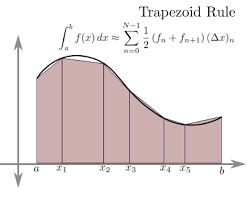

# Integration Example 
Let us integrate $\int_{-1}^4 x^3dx$

In [ ]:
from scipy.integrate import trapz, simps, quad

In [ ]:
#generating a x array
x = np.linspace(-1, 4, 100)

#coding up f(x) = x^3
y = x**3

In [ ]:
#Passing in the x and y array into trapz function for integration
int_trapz = trapz(y, x = x, dx = x[1]-x[0])

In [ ]:
int_trapz

In [ ]:
#Passing in the x and y array into simps function for integration
int_simps = simps(y = y, x = x, dx = x[1] - x[0])

In [ ]:
int_simps

In [ ]:
def integral_function(x):
    
    '''
    Integral function to be used in quad, we are coding up the function f(x) = x^3
    
    Inputs
    ----------------
    x: x-array to be used to evaluate x^3
    
    Returns
    -----------------
    Value evaluated at x^3
    '''
    y = x**3
    
    return y

In [ ]:
#using the quad function to integrate f(x) = x^3
int_quad, err_quad = quad(integral_function, a = -1, b = 4)

In [ ]:
int_quad

In [ ]:
err_quad

# Error Propagation

When you are performing a calculation and that calculation is done using a measurement with some uncertainty you need to propagate that uncertainty to the final result. Below is a table with the function and the corresponding uncertainty and variance. Depending on the function you are using will require the corresponding uncertainty propagation.

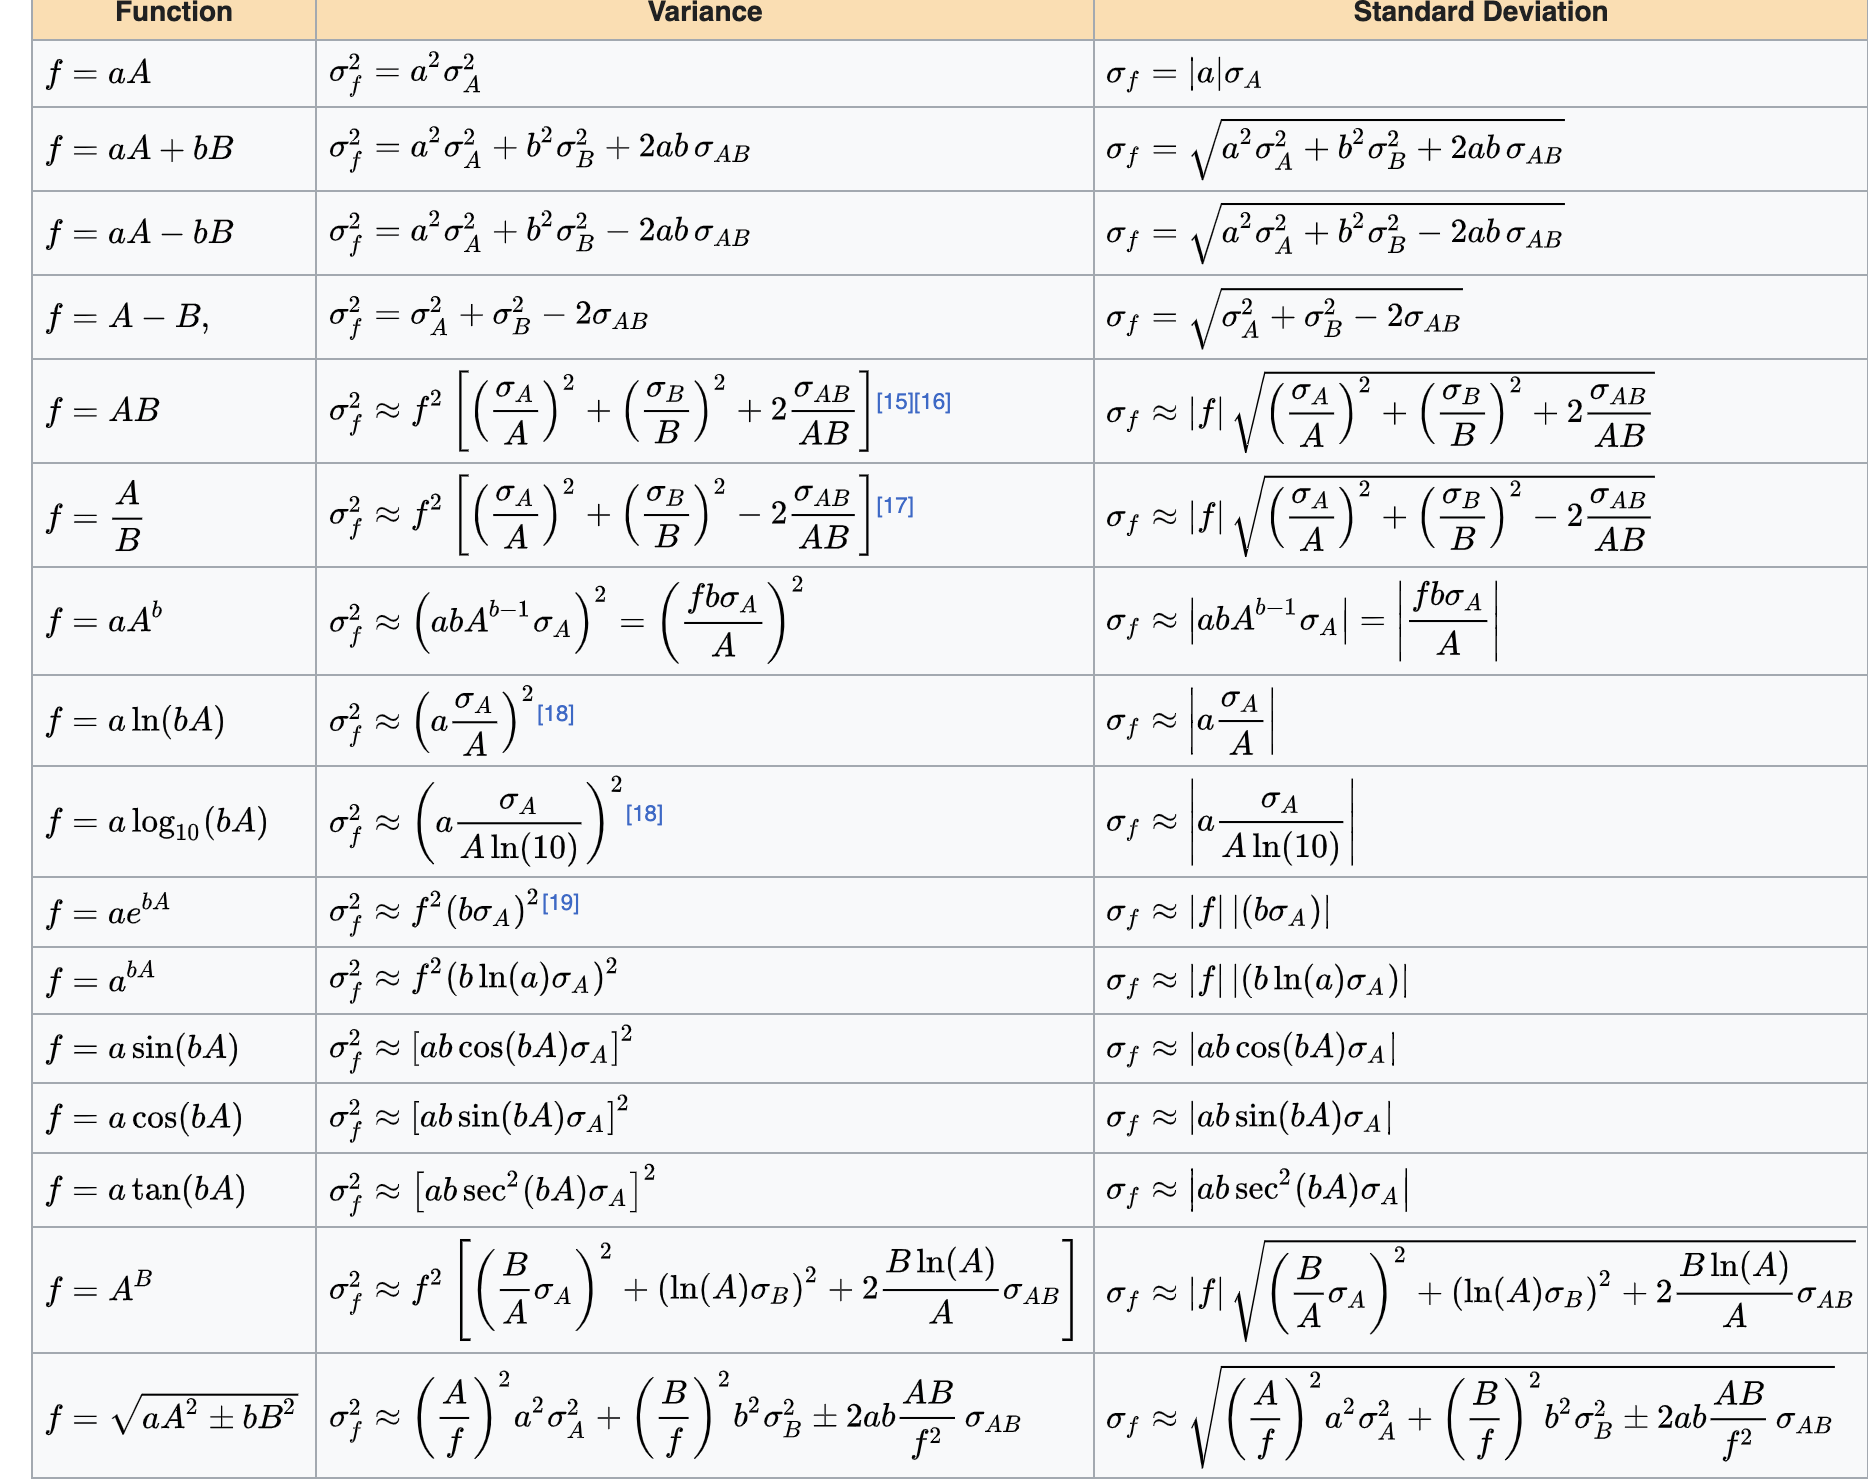



# Excercise Putting it all to use

It is that time to put everything we covered in this notebook to practice. It will build off of the material covered in this notebook but will also require concepts covered in the previous seminars. For this excercise we will go over measuring the flux of an emission line multiple times to get an estimate of the error on the flux. This requires us to get different realization of the spectrum by perturbing the spectra by the error spectra and measuring the flux for every realization.

Steps:

1. Get the spectra and spectra error array
2. Perturb the spectra by the error spectrum to get a new spectrum.

    (ie: New_Spectra = Old_Spectra + Error)
    
    
For part 2, I recommend using the power of numpy arrays to quickly add values to the entire array instead of resorting to for-loops and think about using Error = np.random.normal(loc = 0, scale = ?). Thinking about what the scale would be here.
    
    
3. Fit the emission line: Use the best guess parameters from the model fitting section
4. Measure the flux and store it somewhere
5. Repeat steps 1-4 1000 times
6. Once you have a sample of 1000 flux values plot a histogram 
7. Use the descriptive statistic average, median, the 16th and 84th percentile on your flux arrays


Apply the above steps to the spectra we used in the Model Fiting in the Astro Context section.

To compute the flux of an emission line recall the following equation:

Flux =  $A \sigma$ $\sqrt{2 \pi}$

In [ ]:
# Code goes here

